In [3]:
import pandas as pd

In [4]:
cifar_path='/userhome/cs3/zmsxsl/ICML2026dp/runs_sweeps/cifar10/results.jsonl'
emnist_path='/userhome/cs3/zmsxsl/ICML2026dp/runs_sweeps/emnist_merge/results.jsonl'
mnist_path='/userhome/cs3/zmsxsl/ICML2026dp/runs_sweeps/mnist/results.jsonl'

In [5]:
import json
with open(cifar_path) as f:
    cifar10_data = [json.loads(line) for line in f]
with open(emnist_path) as f:
    emnist_data = [json.loads(line) for line in f]
with open(mnist_path) as f:
    mnist_data = [json.loads(line) for line in f]

In [6]:
cifar10_df=pd.DataFrame(cifar10_data)
emnist_df=pd.DataFrame(emnist_data)
mnist_df=pd.DataFrame(mnist_data)

In [7]:
all_df = pd.concat([cifar10_df, emnist_df, mnist_df], ignore_index=True)

In [8]:
all_df

,accuracy_test,accuracy_train,algo,batch_size,dataloader_dp_delta,dataloader_dp_enabled,dataloader_dp_epsilon,dataloader_dp_mean_batch_size,dataset,delta,...,ntrain,num_batches,num_batches_per_epoch,restart,run,timestamp,total_steps,training_dp_delta,training_dp_epsilon,tree_completion
0,0.6910,0.728940,ftrl_dp,500,0.00001,True,0.073236,500,cifar10,0.00001,...,50000,101,"[101, 101, 101, 101, 101]",1,1,2026-01-23T11:07:02.560108+00:00,505,0.00001,inf,True
1,0.6921,0.728940,ftrl_dp,500,0.00001,True,0.073236,500,cifar10,0.00001,...,50000,101,"[101, 101, 101, 101, 101]",1,1,2026-01-23T11:07:29.182756+00:00,505,0.00001,2256.778258,True
2,0.6653,0.695240,ftrl_dp,500,0.00001,True,0.073236,500,cifar10,0.00001,...,50000,101,"[101, 101, 101, 101, 101]",1,1,2026-01-23T11:07:55.471874+00:00,505,0.00001,639.861260,True
3,0.6763,0.711660,ftrl_dp,500,0.00001,True,0.073236,500,cifar10,0.00001,...,50000,101,"[101, 101, 101, 101, 101]",1,1,2026-01-23T11:08:22.098528+00:00,505,0.00001,314.861260,True
4,0.6685,0.698960,ftrl_dp,500,0.00001,True,0.073236,500,cifar10,0.00001,...,50000,101,"[101, 101, 101, 101, 101]",1,1,2026-01-23T11:08:49.039521+00:00,505,0.00001,194.473034,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.2677,0.261850,sgd_noamp,250,NaN,False,NaN,250,mnist,0.00001,...,60000,240,"[240, 240, 240, 240, 240]",1,1,2026-01-24T08:05:52.087676+00:00,1200,0.00001,48.520701,True
554,0.2321,0.230733,sgd_noamp,250,NaN,False,NaN,250,mnist,0.00001,...,60000,240,"[240, 240, 240, 240, 240]",1,1,2026-01-24T08:06:06.199073+00:00,1200,0.00001,38.314003,True
555,0.2624,0.267300,sgd_noamp,250,NaN,False,NaN,250,mnist,0.00001,...,60000,240,"[240, 240, 240, 240, 240]",1,1,2026-01-24T08:06:21.818540+00:00,1200,0.00001,31.459964,True
556,0.2318,0.226450,sgd_noamp,250,NaN,False,NaN,250,mnist,0.00001,...,60000,240,"[240, 240, 240, 240, 240]",1,1,2026-01-24T08:06:36.078511+00:00,1200,0.00001,26.584627,True


In [9]:
sgd_df = (all_df['algo']=='sgd_noamp')
# all_df[sgd_df]['epsilon']=all_df[sgd_df]['epsilon']/all_df[sgd_df]['num_batches']
all_df.loc[sgd_df, 'training_dp_epsilon']=all_df.loc[sgd_df, 'training_dp_epsilon']/all_df.loc[sgd_df, 'num_batches']

In [10]:
all_df[sgd_df]

,accuracy_test,accuracy_train,algo,batch_size,dataloader_dp_delta,dataloader_dp_enabled,dataloader_dp_epsilon,dataloader_dp_mean_batch_size,dataset,delta,...,ntrain,num_batches,num_batches_per_epoch,restart,run,timestamp,total_steps,training_dp_delta,training_dp_epsilon,tree_completion
72,0.6776,0.712060,sgd_noamp,500,0.00001,True,0.073236,500,cifar10,0.00001,...,50000,101,"[101, 101, 101, 101, 101]",1,1,2026-01-23T11:38:46.567477+00:00,505,0.00001,inf,True
73,0.6814,0.722520,sgd_noamp,500,0.00001,True,0.073236,500,cifar10,0.00001,...,50000,101,"[101, 101, 101, 101, 101]",1,1,2026-01-23T11:39:13.276412+00:00,505,0.00001,276.106715,True
74,0.6420,0.675760,sgd_noamp,500,0.00001,True,0.073236,500,cifar10,0.00001,...,50000,101,"[101, 101, 101, 101, 101]",1,1,2026-01-23T11:39:39.473026+00:00,505,0.00001,69.856715,True
75,0.6271,0.651520,sgd_noamp,500,0.00001,True,0.073236,500,cifar10,0.00001,...,50000,101,"[101, 101, 101, 101, 101]",1,1,2026-01-23T11:40:05.835165+00:00,505,0.00001,31.662271,True
76,0.5893,0.610380,sgd_noamp,500,0.00001,True,0.073236,500,cifar10,0.00001,...,50000,101,"[101, 101, 101, 101, 101]",1,1,2026-01-23T11:40:32.700872+00:00,505,0.00001,18.294215,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.2677,0.261850,sgd_noamp,250,NaN,False,NaN,250,mnist,0.00001,...,60000,240,"[240, 240, 240, 240, 240]",1,1,2026-01-24T08:05:52.087676+00:00,1200,0.00001,0.202170,True
554,0.2321,0.230733,sgd_noamp,250,NaN,False,NaN,250,mnist,0.00001,...,60000,240,"[240, 240, 240, 240, 240]",1,1,2026-01-24T08:06:06.199073+00:00,1200,0.00001,0.159642,True
555,0.2624,0.267300,sgd_noamp,250,NaN,False,NaN,250,mnist,0.00001,...,60000,240,"[240, 240, 240, 240, 240]",1,1,2026-01-24T08:06:21.818540+00:00,1200,0.00001,0.131083,True
556,0.2318,0.226450,sgd_noamp,250,NaN,False,NaN,250,mnist,0.00001,...,60000,240,"[240, 240, 240, 240, 240]",1,1,2026-01-24T08:06:36.078511+00:00,1200,0.00001,0.110769,True


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set ICML style with white background
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 6
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['grid.color'] = '#cccccc'
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['grid.linewidth'] = 0.5
sns.set_style("white")

In [19]:
# Explore the data structure
print("Datasets in all_df:", all_df['dataset'].unique())
print("Algorithms in all_df:", all_df['algo'].unique())
print("DP Dataloader enabled values:", all_df['dataloader_dp_enabled'].unique())
print("\nDataframe shape:", all_df.shape)
print("\nColumn names:", all_df.columns.tolist())

Datasets in all_df: ['cifar10' 'emnist_merge' 'mnist']
Algorithms in all_df: ['sgd_tree' 'sgd_matrix' 'sgd_naive_noise']
DP Dataloader enabled values: [ True False]

Dataframe shape: (558, 30)

Column names: ['accuracy_test', 'accuracy_train', 'algo', 'batch_size', 'dataloader_dp_delta', 'dataloader_dp_enabled', 'dataloader_dp_epsilon', 'dataloader_dp_mean_batch_size', 'dataset', 'delta', 'effi_noise', 'epochs', 'epsilon', 'ftrl_noise', 'l2_norm_clip', 'learning_rate', 'log_dir', 'momentum', 'noise_multiplier', 'ntest', 'ntrain', 'num_batches', 'num_batches_per_epoch', 'restart', 'run', 'timestamp', 'total_steps', 'training_dp_delta', 'training_dp_epsilon', 'tree_completion']


In [32]:
# Rename algorithms for better readability  
# Create algo column based on ftrl_noise values and dataloader_dp_enabled
def create_algo_name(row):
    ftrl_val = row['ftrl_noise']
    
    # Determine suffix based on dp-dataloader
    suffix = '_edit' if row['dataloader_dp_enabled'] else '_hamming'
    
    if ftrl_val == 'tree':
        return 'sgd_tree_dp' + suffix
    elif ftrl_val == 'matrix':
        return 'sgd_matrix_dp' + suffix
    elif ftrl_val == 'na':
        return 'sgd_naive_dp' + suffix
    else:
        return str(ftrl_val)

all_df['algo'] = all_df.apply(create_algo_name, axis=1)

# Create sgd_nodp as a separate label for the non-DP baseline (noise=0, hamming)
all_df['algo_display'] = all_df['algo']
all_df.loc[(all_df['algo'] == 'sgd_naive_dp_hamming') & (all_df['noise_multiplier'] == 0.0), 'algo_display'] = 'sgd_nodp'

# Verify the naming worked correctly
print("Unique algorithms created:")
print(sorted(all_df['algo'].unique()))
print("\nAlgorithm counts (original algo column):")
print(all_df['algo'].value_counts().sort_index())
print("\nAlgorithm counts (display algo column):")
print(all_df['algo_display'].value_counts().sort_index())


Unique algorithms created:
['sgd_matrix_dp_edit', 'sgd_matrix_dp_hamming', 'sgd_naive_dp_edit', 'sgd_naive_dp_hamming', 'sgd_tree_dp_edit', 'sgd_tree_dp_hamming']

Algorithm counts (original algo column):
algo
sgd_matrix_dp_edit       93
sgd_matrix_dp_hamming    93
sgd_naive_dp_edit        93
sgd_naive_dp_hamming     93
sgd_tree_dp_edit         93
sgd_tree_dp_hamming      93
Name: count, dtype: int64

Algorithm counts (display algo column):
algo_display
sgd_matrix_dp_edit       93
sgd_matrix_dp_hamming    93
sgd_naive_dp_edit        93
sgd_naive_dp_hamming     90
sgd_nodp                  3
sgd_tree_dp_edit         93
sgd_tree_dp_hamming      93
Name: count, dtype: int64


Saved: figures/sgd_naive_noise_comparison.pdf


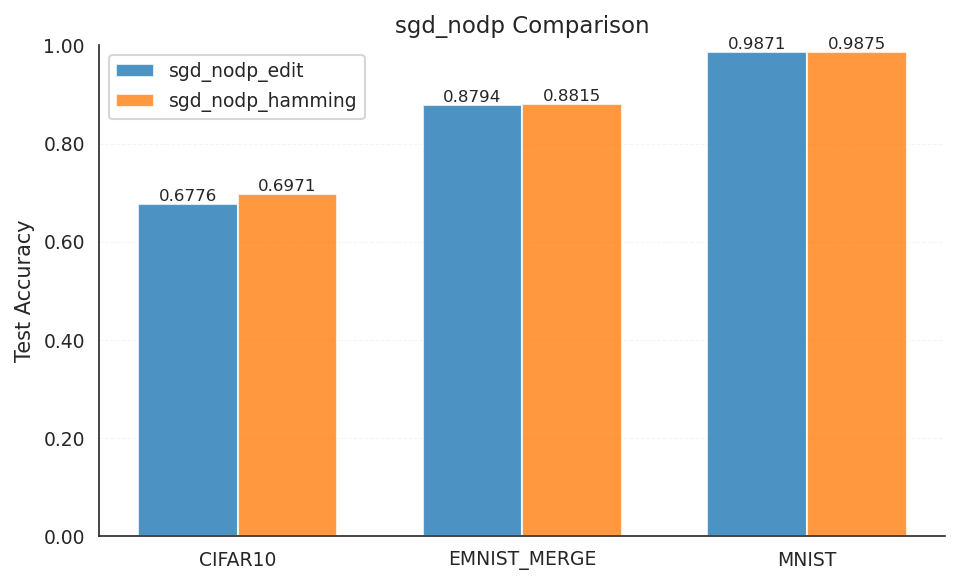

In [43]:
# Plot 1: Barplot comparing accuracy with and without DP dataloader (sgd_nodp, noise_multiplier=0)
fig, ax = plt.subplots(figsize=(6.5, 4))

datasets = sorted(all_df['dataset'].unique())
bar_width = 0.35
x_pos = range(len(datasets))

with_dp_accuracies = []
without_dp_accuracies = []

for dataset in datasets:
    dataset_df = all_df[all_df['dataset'] == dataset]
    # Filter for sgd_naive_dp with noise=0 (should have both _edit and _hamming variants)
    sgd_zero_noise = dataset_df[(dataset_df['algo'].str.contains('sgd_naive_dp', na=False)) & (dataset_df['noise_multiplier'] == 0.0)]
    
    with_dp_loader = sgd_zero_noise[sgd_zero_noise['dataloader_dp_enabled'] == True]
    without_dp_loader = sgd_zero_noise[sgd_zero_noise['dataloader_dp_enabled'] == False]
    
    with_dp_acc = with_dp_loader['accuracy_test'].mean() if len(with_dp_loader) > 0 else 0
    without_dp_acc = without_dp_loader['accuracy_test'].mean() if len(without_dp_loader) > 0 else 0
    
    with_dp_accuracies.append(with_dp_acc)
    without_dp_accuracies.append(without_dp_acc)

# Create bars with ICML style
bars1 = ax.bar([x - bar_width/2 for x in x_pos], with_dp_accuracies, bar_width, 
               label='sgd_nodp_edit', color='#1f77b4', alpha=0.8)
bars2 = ax.bar([x + bar_width/2 for x in x_pos], without_dp_accuracies, bar_width, 
               label='sgd_nodp_hamming', color='#ff7f0e', alpha=0.8)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Test Accuracy')
ax.set_title('sgd_nodp Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels([d.upper() for d in datasets])
ax.set_ylim([0, 1.0])
# Format y-axis ticks to 2 decimal places
ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2f}'.format(y)))
ax.legend()
ax.grid(True, alpha=0.2, axis='y', linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# Save barplot as PDF
import os
os.makedirs('figures', exist_ok=True)
bar_pdf_path = 'figures/sgd_naive_noise_comparison.pdf'
plt.savefig(bar_pdf_path, format='pdf', dpi=300, bbox_inches='tight')
print(f'Saved: {bar_pdf_path}')

plt.show()


Saved: figures/cifar10_privacy_accuracy_tradeoff.pdf


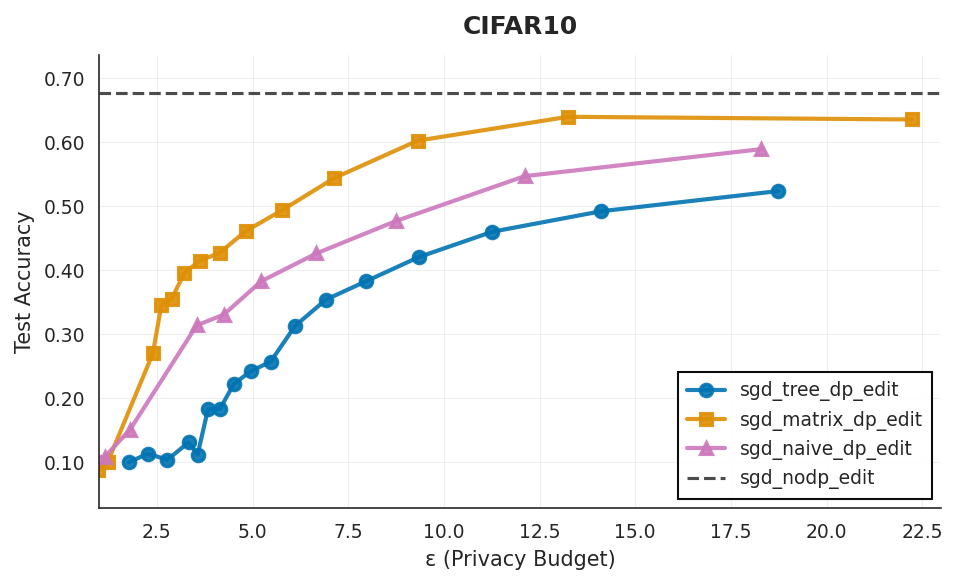

Saved: figures/emnist_merge_privacy_accuracy_tradeoff.pdf


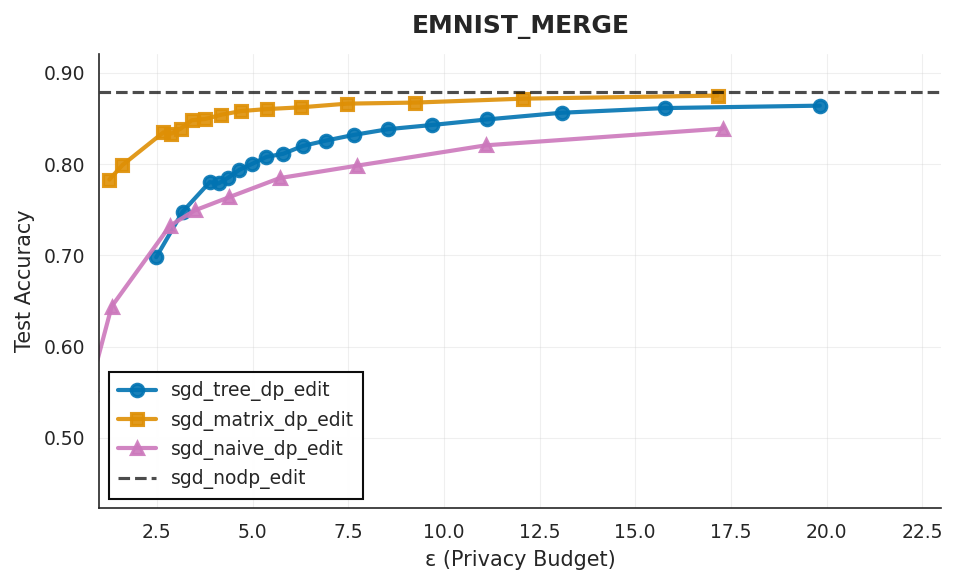

Saved: figures/mnist_privacy_accuracy_tradeoff.pdf


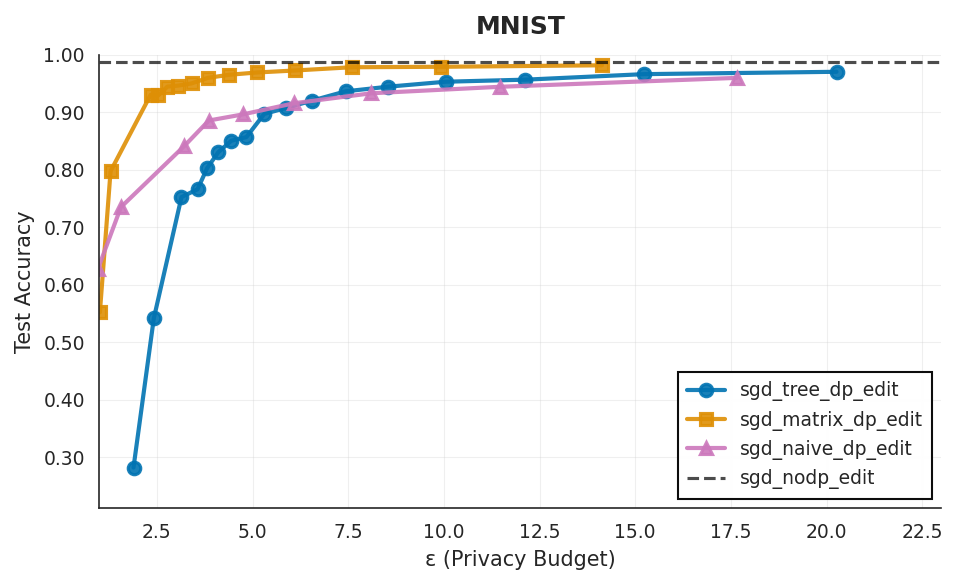

In [42]:
# Plot 2: Three algorithms comparison (epsilon vs accuracy, separated figures for each dataset)
# Using data points with a loss threshold to allow more points while avoiding huge fluctuations
datasets = sorted(all_df['dataset'].unique())
# ICML-style professional colors (colorblind-friendly palette)
colors_algo = {'sgd_tree_dp_edit': '#0173B2',
               'sgd_matrix_dp_edit': '#DE8F05',
               'sgd_naive_dp_edit': '#CC78BC'}
markers_algo = {'sgd_tree_dp_edit': 'o',
                'sgd_matrix_dp_edit': 's',
                'sgd_naive_dp_edit': '^'}
labels_algo = {'sgd_tree_dp_edit': 'sgd_tree_dp_edit',
               'sgd_matrix_dp_edit': 'sgd_matrix_dp_edit',
               'sgd_naive_dp_edit': 'sgd_naive_dp_edit'}

def get_data_with_loss_threshold(data_sorted, loss_threshold=0.05):
    """Extract data points allowing some loss within a threshold"""
    if len(data_sorted) == 0:
        return data_sorted
    
    filtered_data = [data_sorted.iloc[0]]
    best_so_far = data_sorted.iloc[0]['accuracy_test']
    
    for i in range(1, len(data_sorted)):
        current_acc = data_sorted.iloc[i]['accuracy_test']
        # Accept point if it's >= best_so_far OR if it's not too much worse
        if current_acc >= best_so_far - loss_threshold:
            filtered_data.append(data_sorted.iloc[i])
            if current_acc > best_so_far:
                best_so_far = current_acc
    
    return pd.DataFrame(filtered_data).reset_index(drop=True)

def smooth_nearby_points(data, epsilon_threshold=0.1):
    """Merge nearby x-values (epsilon) and keep only the best accuracy point"""
    if len(data) <= 1:
        return data
    
    smoothed = []
    current_group = [data.iloc[0]]
    
    for i in range(1, len(data)):
        # Check if current point is close to the last point in current group
        if abs(data.iloc[i]['training_dp_epsilon'] - current_group[-1]['training_dp_epsilon']) <= epsilon_threshold:
            current_group.append(data.iloc[i])
        else:
            # Keep the point with highest accuracy from current group
            best_in_group = max(current_group, key=lambda x: x['accuracy_test'])
            smoothed.append(best_in_group)
            current_group = [data.iloc[i]]
    
    # Don't forget the last group
    best_in_group = max(current_group, key=lambda x: x['accuracy_test'])
    smoothed.append(best_in_group)
    
    return pd.DataFrame(smoothed).reset_index(drop=True)

# Calculate non-DP baselines for each dataset (sgd_naive_dp_edit with noise=0)
non_dp_baselines = {}
for dataset in datasets:
    dataset_df = all_df[all_df['dataset'] == dataset]
    sgd_zero_noise = dataset_df[(dataset_df['algo'] == 'sgd_naive_dp_edit') & (dataset_df['noise_multiplier'] == 0.0)]
    baseline_acc = sgd_zero_noise['accuracy_test'].mean() if len(sgd_zero_noise) > 0 else None
    non_dp_baselines[dataset] = baseline_acc

for dataset in datasets:
    fig, ax = plt.subplots(figsize=(6.5, 4))
    dataset_df = all_df[all_df['dataset'] == dataset]
    
    # Use uniform epsilon range across all datasets
    max_epsilon = 23.0
    
    # Collect all accuracy values to determine y-axis range
    all_accuracies = []
    
    # Iterate through only _edit variants
    for base_algo in ['sgd_tree_dp', 'sgd_matrix_dp', 'sgd_naive_dp']:
        algo = base_algo + '_edit'
        algo_data = dataset_df[dataset_df['algo'] == algo]
        
        if len(algo_data) > 0:
            # Use training_dp_epsilon as the primary epsilon metric
            algo_sorted = algo_data.sort_values('training_dp_epsilon')
            # Filter to uniform epsilon range 0-20
            algo_filtered = algo_sorted[(algo_sorted['training_dp_epsilon'] >= 0) & (algo_sorted['training_dp_epsilon'] <= max_epsilon)]
            
            # Get data points with loss threshold
            algo_filtered_loss = get_data_with_loss_threshold(algo_filtered, loss_threshold=0.02)
            
            # Smooth nearby points to avoid sudden jumps
            algo_smoothed = smooth_nearby_points(algo_filtered_loss, epsilon_threshold=0.2)
            
            if len(algo_smoothed) > 0:
                ax.plot(algo_smoothed['training_dp_epsilon'], algo_smoothed['accuracy_test'], 
                       marker=markers_algo[algo], label=labels_algo[algo], linewidth=2.0, markersize=6, 
                       color=colors_algo[algo], alpha=0.9, markerfacecolor=colors_algo[algo], 
                       markeredgewidth=1.5, markeredgecolor=colors_algo[algo])
                all_accuracies.extend(algo_smoothed['accuracy_test'].values)
    
    # Add horizontal dashed line for non-DP baseline
    if non_dp_baselines[dataset] is not None:
        ax.axhline(y=non_dp_baselines[dataset], color='black', linestyle='--', linewidth=1.5, 
                   label='sgd_nodp_edit', alpha=0.7)
        all_accuracies.append(non_dp_baselines[dataset])
    
    ax.set_xlabel('ε (Privacy Budget)', fontweight='normal')
    ax.set_ylabel('Test Accuracy', fontweight='normal')
    ax.set_title(f'{dataset.upper()}', fontsize=12, fontweight='bold', pad=10)
    ax.set_xlim([1, max_epsilon])
    
    # Set y-axis limits based on actual data range with padding
    if len(all_accuracies) > 0:
        min_acc = min(all_accuracies)
        max_acc = max(all_accuracies)
        padding = (max_acc - min_acc) * 0.1  # 10% padding
        ax.set_ylim([max(0, min_acc - padding), min(1.0, max_acc + padding)])
    else:
        ax.set_ylim([0, 1])
    
    # Format y-axis ticks to 2 decimal places
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2f}'.format(y)))
    
    ax.legend(loc='best', frameon=True, fancybox=False, shadow=False, 
              edgecolor='black', framealpha=0.95, borderpad=0.5)
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    
    plt.tight_layout()
    
    # Save as PDF
    import os
    os.makedirs('figures', exist_ok=True)
    pdf_path = f'figures/{dataset}_privacy_accuracy_tradeoff.pdf'
    plt.savefig(pdf_path, format='pdf', dpi=300, bbox_inches='tight')
    print(f'Saved: {pdf_path}')
    
    plt.show()


In [28]:
# Debug: Check the structure of sgd_naive_dp data with noise=0
print("Unique algorithms containing 'sgd_naive':")
print(all_df[all_df['algo'].str.contains('sgd_naive', na=False)]['algo'].unique())

print("\nFor CIFAR10 dataset, sgd_naive_dp with noise=0:")
cifar_sgd = all_df[(all_df['dataset'] == 'cifar10') & (all_df['algo'].str.contains('sgd_naive_dp', na=False)) & (all_df['noise_multiplier'] == 0.0)]
print(f"Total rows: {len(cifar_sgd)}")
if len(cifar_sgd) > 0:
    print(cifar_sgd[['algo', 'dataloader_dp_enabled', 'noise_multiplier', 'accuracy_test']].drop_duplicates())

print("\nFor EMNIST_MERGE dataset, sgd_naive_dp with noise=0:")
emnist_sgd = all_df[(all_df['dataset'] == 'emnist_merge') & (all_df['algo'].str.contains('sgd_naive_dp', na=False)) & (all_df['noise_multiplier'] == 0.0)]
print(f"Total rows: {len(emnist_sgd)}")
if len(emnist_sgd) > 0:
    print(emnist_sgd[['algo', 'dataloader_dp_enabled', 'noise_multiplier', 'accuracy_test']].drop_duplicates())

print("\nAll unique (algo, dataloader_dp_enabled) combinations:")
print(all_df[['algo', 'dataloader_dp_enabled']].drop_duplicates().sort_values(['algo', 'dataloader_dp_enabled']))


Unique algorithms containing 'sgd_naive':
['sgd_naive_dp_edit' 'sgd_naive_dp_hamming']

For CIFAR10 dataset, sgd_naive_dp with noise=0:
Total rows: 1
                 algo  dataloader_dp_enabled  noise_multiplier  accuracy_test
72  sgd_naive_dp_edit                   True               0.0         0.6776

For EMNIST_MERGE dataset, sgd_naive_dp with noise=0:
Total rows: 1
                  algo  dataloader_dp_enabled  noise_multiplier  accuracy_test
258  sgd_naive_dp_edit                   True               0.0       0.879439

All unique (algo, dataloader_dp_enabled) combinations:
                     algo  dataloader_dp_enabled
36     sgd_matrix_dp_edit                   True
54  sgd_matrix_dp_hamming                  False
72      sgd_naive_dp_edit                   True
91   sgd_naive_dp_hamming                  False
90               sgd_nodp                  False
0        sgd_tree_dp_edit                   True
18    sgd_tree_dp_hamming                  False


In [25]:
# Check sgd_naive_dp_hamming entries
print("All sgd_naive_dp_hamming entries:")
hamming_data = all_df[all_df['algo'] == 'sgd_naive_dp_hamming']
print(f"Total rows: {len(hamming_data)}")
print(hamming_data[['dataset', 'noise_multiplier', 'dataloader_dp_enabled', 'accuracy_test']].head(20))

print("\n\nAll sgd_naive_dp_edit entries:")
edit_data = all_df[all_df['algo'] == 'sgd_naive_dp_edit']
print(f"Total rows: {len(edit_data)}")
print(edit_data[['dataset', 'noise_multiplier', 'dataloader_dp_enabled', 'accuracy_test']].head(20))


All sgd_naive_dp_hamming entries:
Total rows: 90
     dataset  noise_multiplier  dataloader_dp_enabled  accuracy_test
91   cifar10               0.1                  False         0.6964
92   cifar10               0.2                  False         0.6762
93   cifar10               0.3                  False         0.6513
94   cifar10               0.4                  False         0.6062
95   cifar10               0.5                  False         0.5499
96   cifar10               1.0                  False         0.3092
97   cifar10               2.0                  False         0.1162
98   cifar10               3.0                  False         0.1023
99   cifar10               4.0                  False         0.0986
100  cifar10               5.0                  False         0.1215
101  cifar10               6.0                  False         0.1120
102  cifar10               7.0                  False         0.1097
103  cifar10               8.0                  False 

In [26]:
# Check what happened with the algorithm renaming - look at original data before renaming
# Let's look for rows where ftrl_noise == 'na' and noise_multiplier == 0
print("Check: rows with ftrl_noise='na', noise_multiplier=0 by dataset and dataloader_dp_enabled:")

# Reload the raw data to check
cifar_path='/userhome/cs3/zmsxsl/ICML2026dp/runs_sweeps/cifar10/results.jsonl'
emnist_path='/userhome/cs3/zmsxsl/ICML2026dp/runs_sweeps/emnist_merge/results.jsonl'
mnist_path='/userhome/cs3/zmsxsl/ICML2026dp/runs_sweeps/mnist/results.jsonl'

import json
with open(cifar_path) as f:
    cifar10_raw = [json.loads(line) for line in f]

# Check for noise=0 entries with ftrl_noise='na'
print("\nCIFAR10 - entries with noise_multiplier=0 and ftrl_noise='na':")
for row in cifar10_raw:
    if row.get('noise_multiplier') == 0.0 and row.get('ftrl_noise') == 'na':
        print(f"  dataloader_dp_enabled={row.get('dataloader_dp_enabled')}, accuracy={row.get('accuracy_test')}")

print("\nTotal CIFAR10 raw rows:", len(cifar10_raw))
print("Unique noise_multiplier values:", sorted(set(row.get('noise_multiplier') for row in cifar10_raw)))


Check: rows with ftrl_noise='na', noise_multiplier=0 by dataset and dataloader_dp_enabled:

CIFAR10 - entries with noise_multiplier=0 and ftrl_noise='na':
  dataloader_dp_enabled=True, accuracy=0.6776
  dataloader_dp_enabled=False, accuracy=0.6971

Total CIFAR10 raw rows: 186
Unique noise_multiplier values: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 12.0, 15.0]


In [31]:
# Check sgd_naive_dp_hamming with noise=0
hamming_zero = all_df[(all_df['algo'] == 'sgd_naive_dp_hamming') & (all_df['noise_multiplier'] == 0.0)]
print("sgd_naive_dp_hamming with noise_multiplier=0:")
print(f"Total rows: {len(hamming_zero)}")
if len(hamming_zero) > 0:
    print(hamming_zero[['dataset', 'dataloader_dp_enabled', 'accuracy_test']])

print("\n\nsgd_nodp entries:")
nodp = all_df[all_df['algo'] == 'sgd_nodp']
print(f"Total rows: {len(nodp)}")
if len(nodp) > 0:
    print(nodp[['dataset', 'dataloader_dp_enabled', 'noise_multiplier', 'accuracy_test']])


sgd_naive_dp_hamming with noise_multiplier=0:
Total rows: 0


sgd_nodp entries:
Total rows: 3
          dataset  dataloader_dp_enabled  noise_multiplier  accuracy_test
90        cifar10                  False               0.0       0.697100
276  emnist_merge                  False               0.0       0.881528
462         mnist                  False               0.0       0.987500
